In [1]:
import torch as th
import matplotlib.pyplot as plt
import seaborn as sns
from trainer import ema
sns.set_context('poster')

In [2]:
A = th.load('saved/RELU-16-double/0001/trainer')
B = th.load('saved/RELU-16-quart/0001/trainer')
C = th.load('saved/RELU-19-halved/0003/trainer')
D = th.load('saved/RELU-19/0001/trainer')
E = th.load('saved/SELU-16-double/0001/trainer')
F = th.load('saved/SELU-16-quart/0001/trainer')
G = th.load('saved/SELU-19-halved/0001/trainer')
H = th.load('saved/SELU-19/0001/trainer')

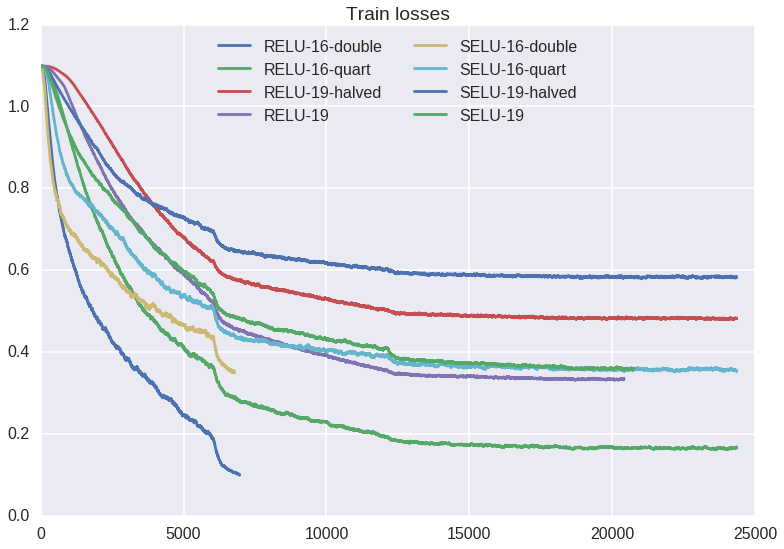

In [3]:
def add_plot(T, alpha=0.01):
    plt.plot(ema(T.losses, alpha), label=T.path[6:-5])
    
plt.close()
plt.title('Train losses')
for T in A, B, C, D, E, F, G, H:
    add_plot(T)
plt.legend(loc='upper center', ncol=2)
plt.show()

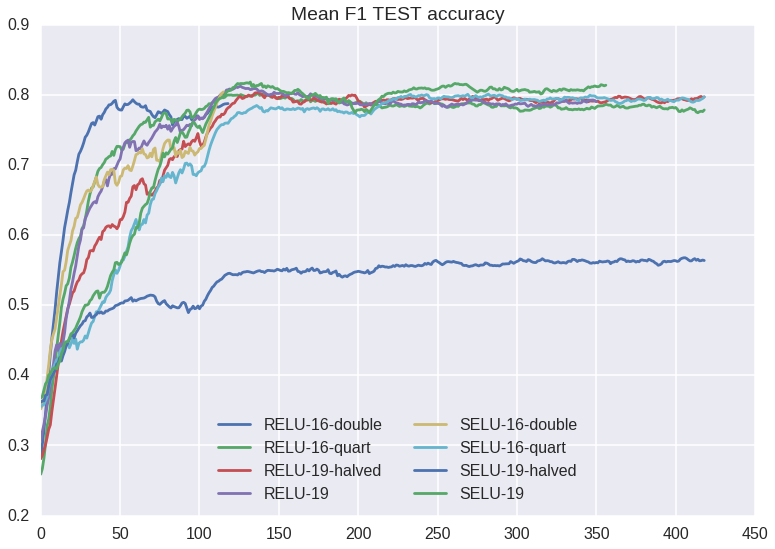

In [4]:
def add_plot(T, alpha=0.1):
    plt.plot(ema(th.cat(T.test_F1)[:, -1], alpha), label=T.path[6:-5])
    
plt.close()
plt.title('Mean F1 TEST accuracy')
for T in A, B, C, D, E, F, G, H:
    add_plot(T)
plt.legend(loc='lower center', ncol=2)
plt.show()

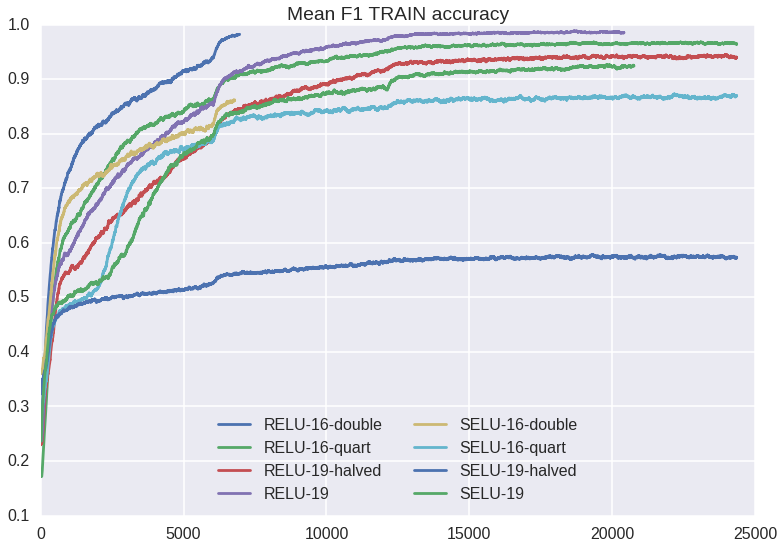

In [5]:
def add_plot(T, alpha=0.01):
    plt.plot(ema(th.cat(T.train_F1)[:, -1], alpha), label=T.path[6:-5])
    
plt.close()
plt.title('Mean F1 TRAIN accuracy')
for T in A, B, C, D, E, F, G, H:
    add_plot(T)
plt.legend(loc='lower center', ncol=2)
plt.show()

In [6]:
def plot(T):
    plt.close()
    print(T.path)
    f1, f2, f3 = T.plot(.01, .01, .1)
    plt.title('Test accuracy  ' + T.path)
    plt.show()
    return T

saved/RELU-16-double/0001


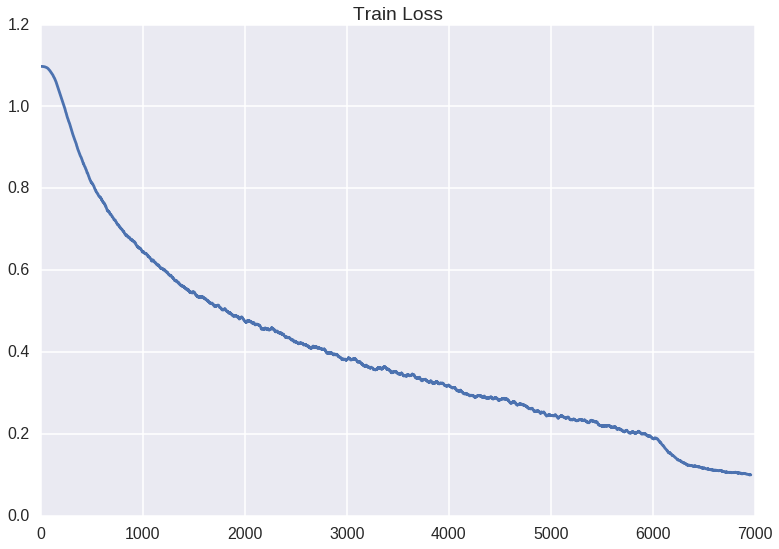

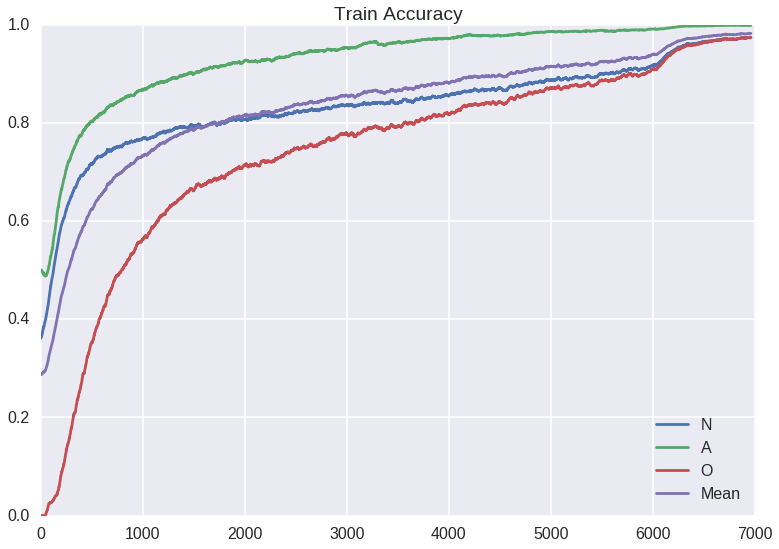

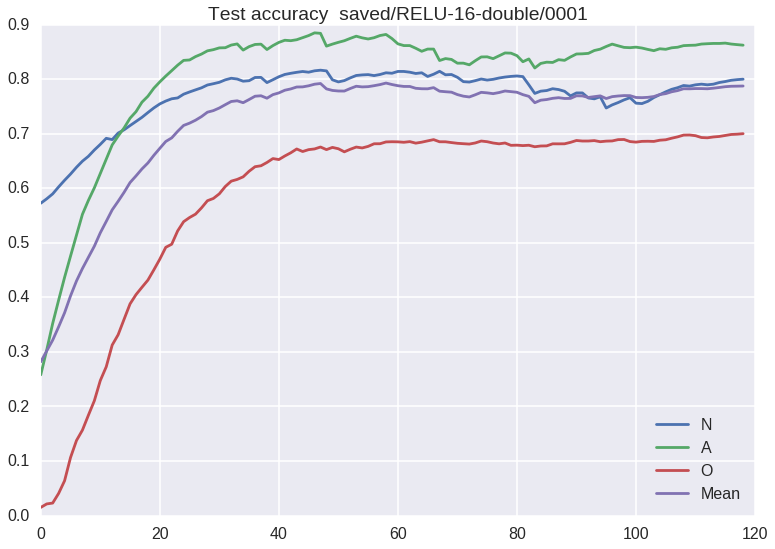

In [7]:
plot(A)
    

saved/RELU-16-quart/0001


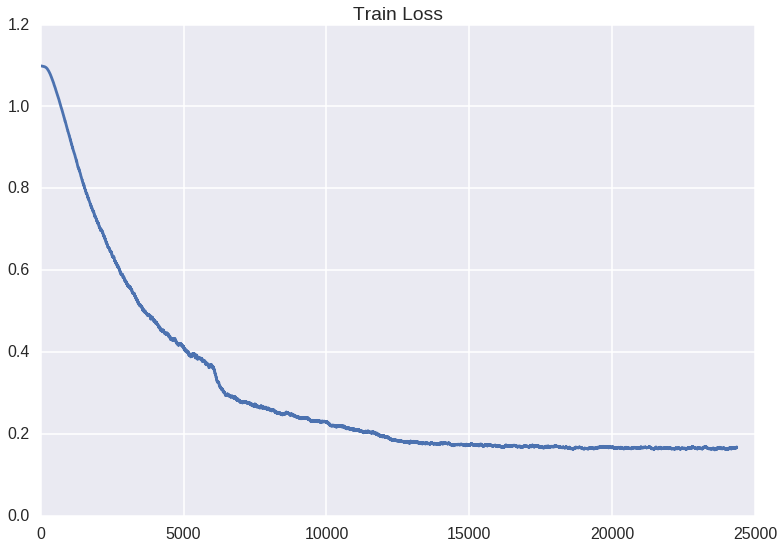

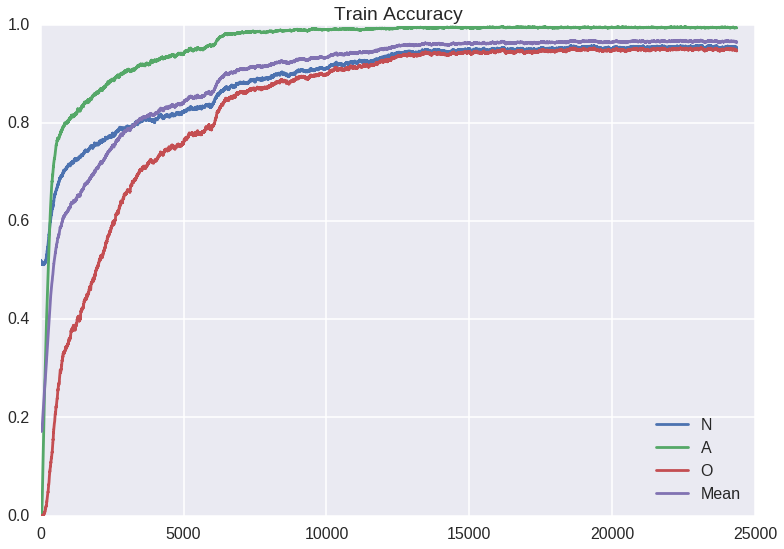

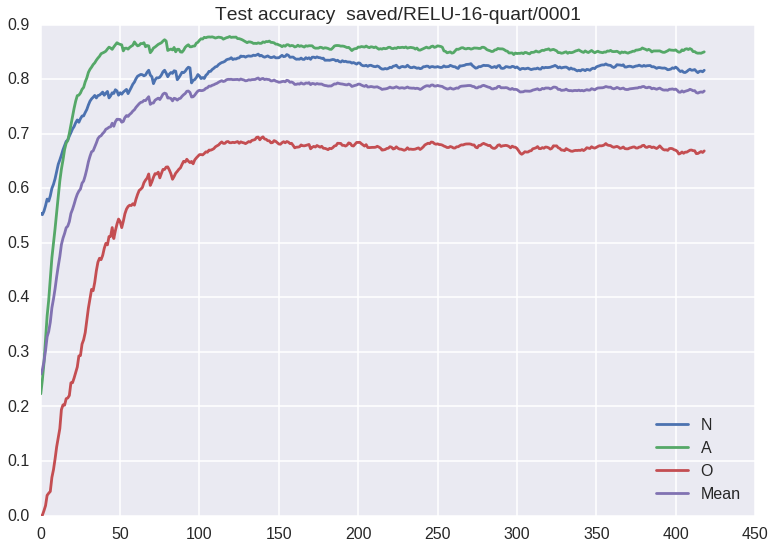

In [8]:
plot(B)
    

saved/RELU-19-halved/0003


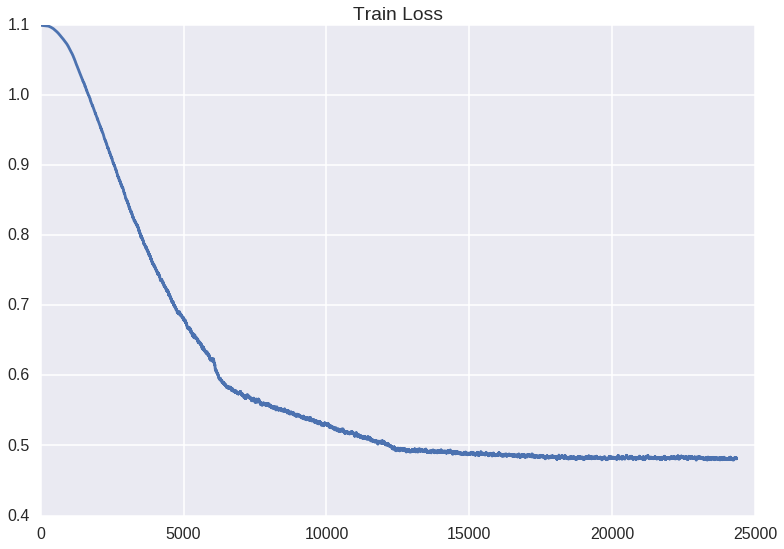

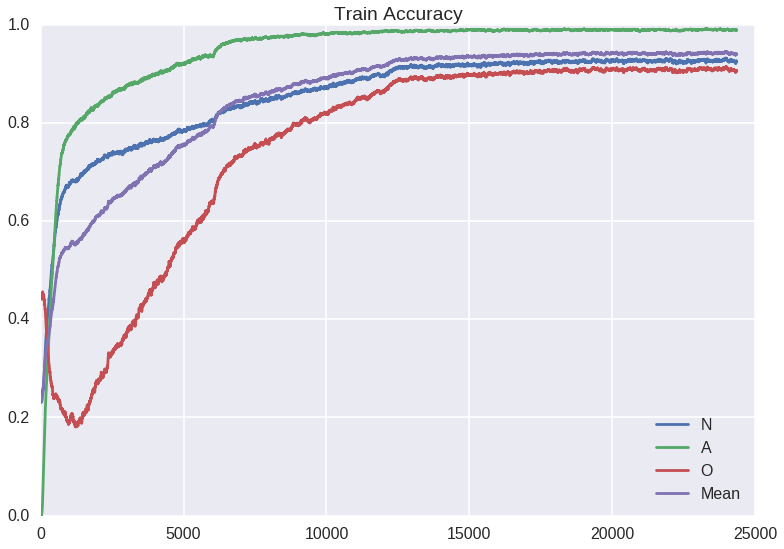

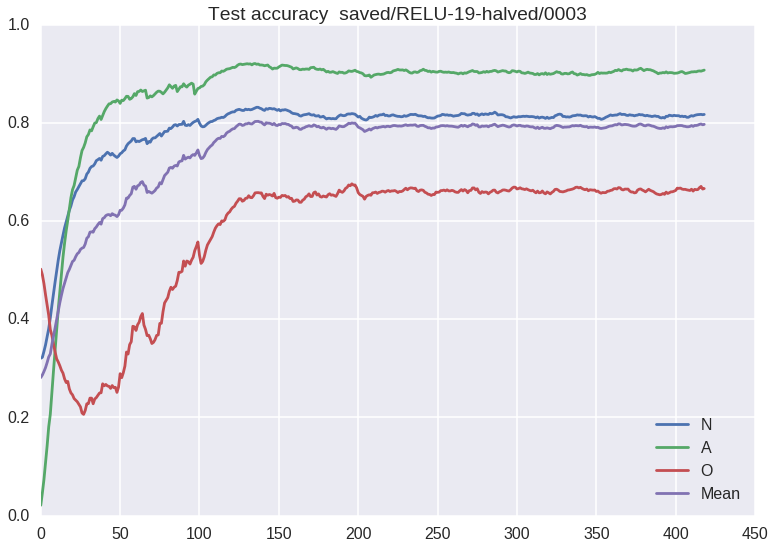

In [9]:
plot(C)
    

saved/RELU-19/0001


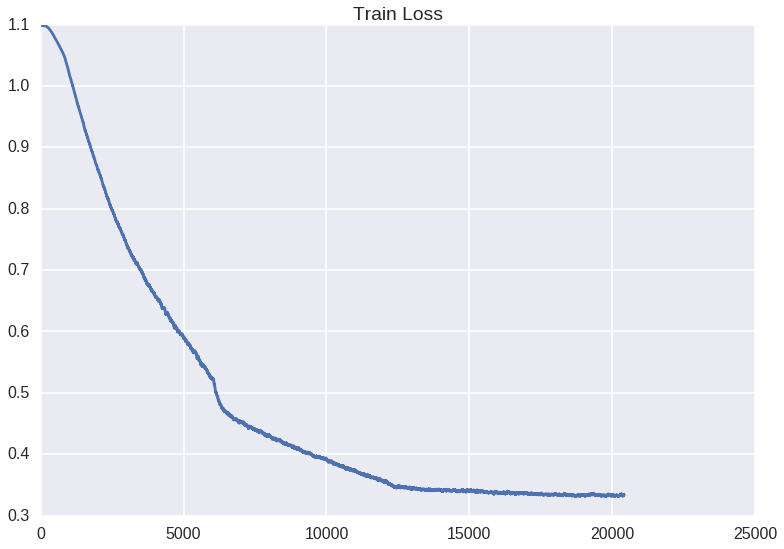

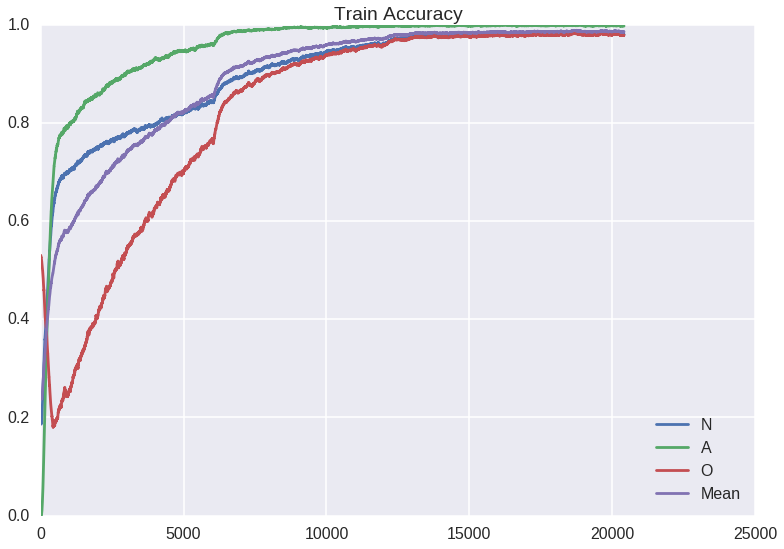

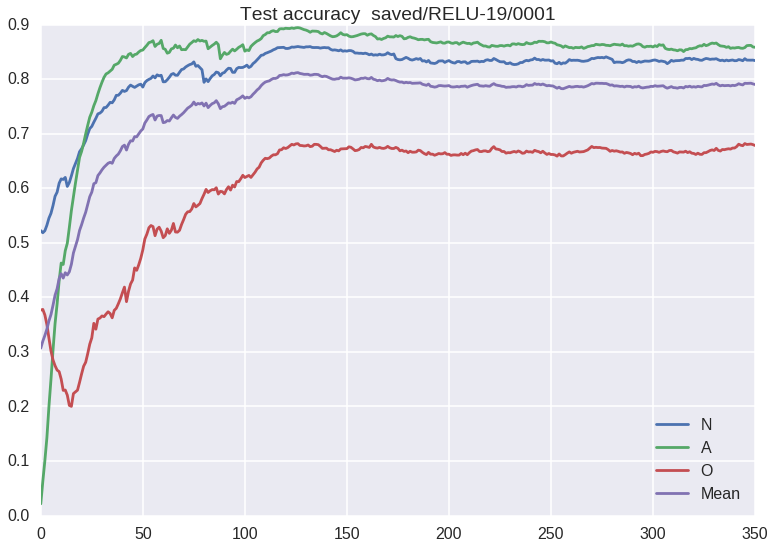

In [10]:
plot(D)
    

saved/SELU-16-double/0001


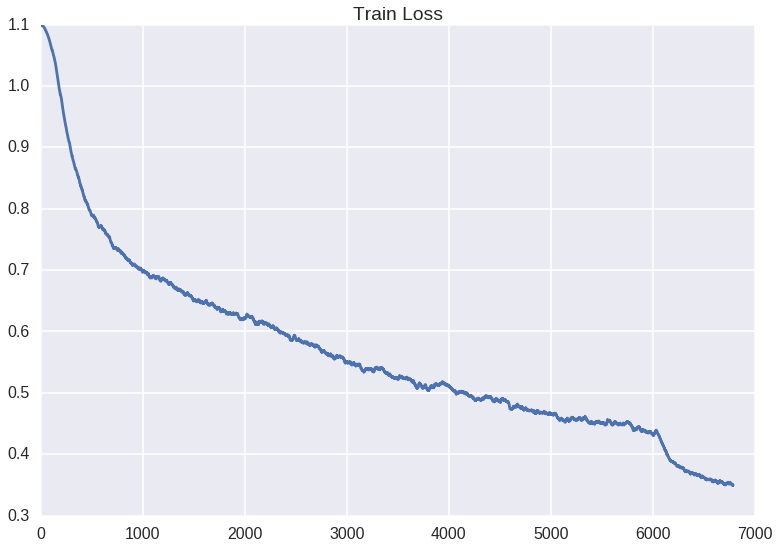

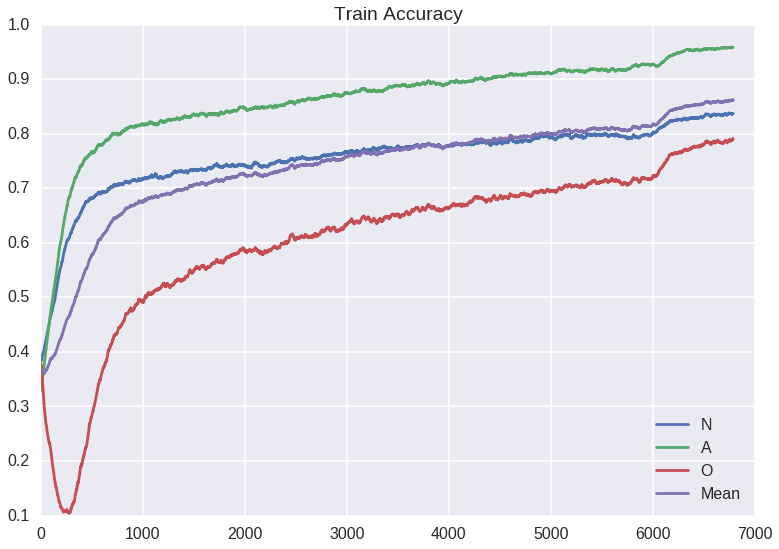

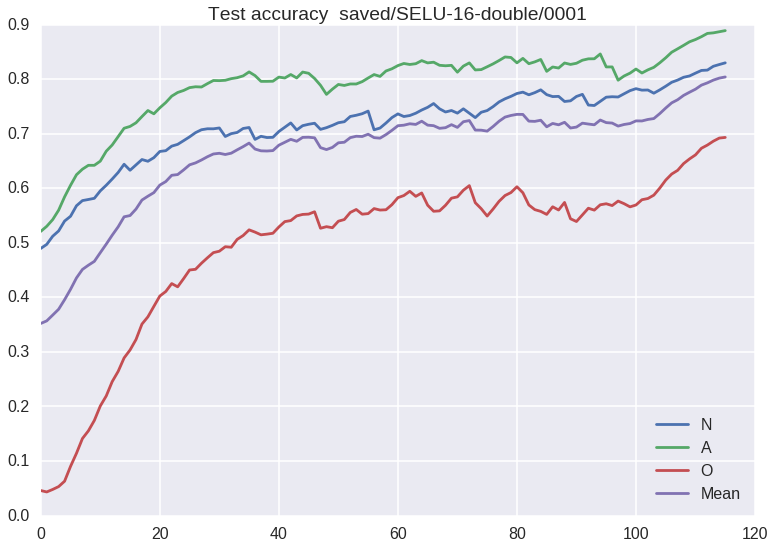

In [11]:
plot(E)
    

saved/SELU-16-quart/0001


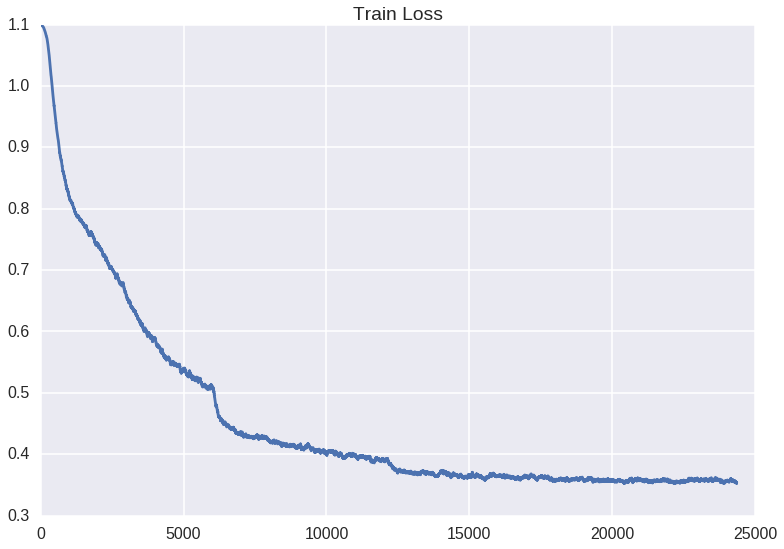

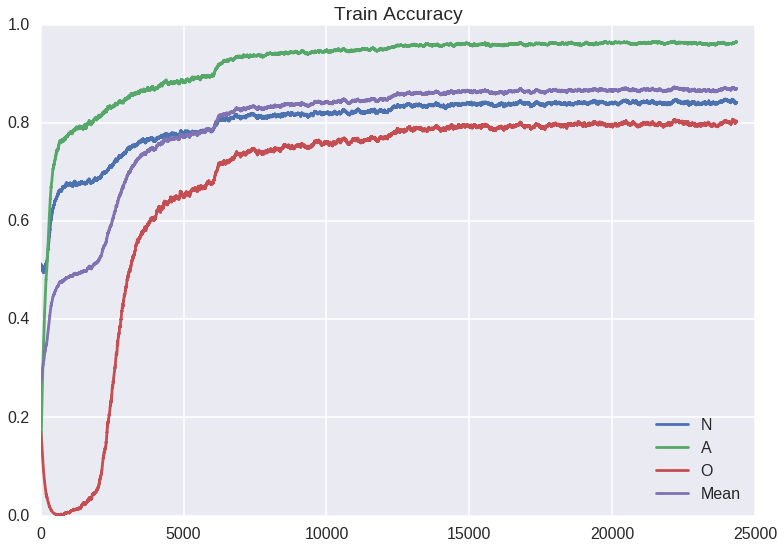

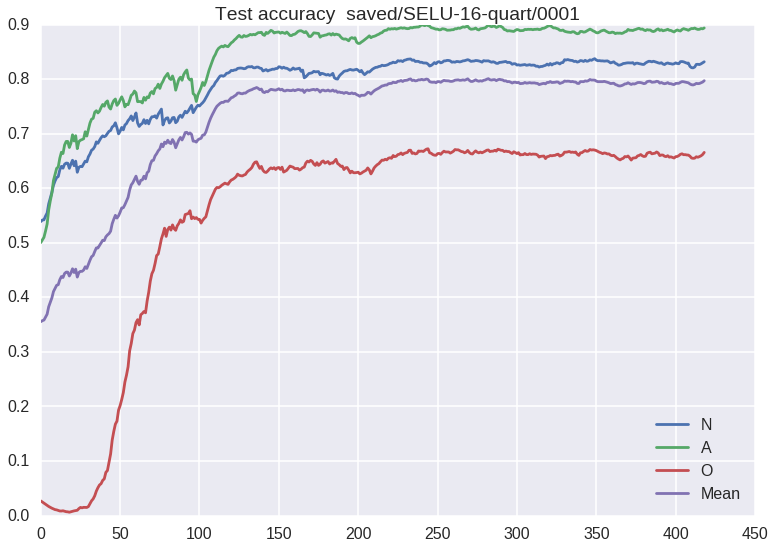

In [12]:
plot(F)
    

saved/SELU-19-halved/0001


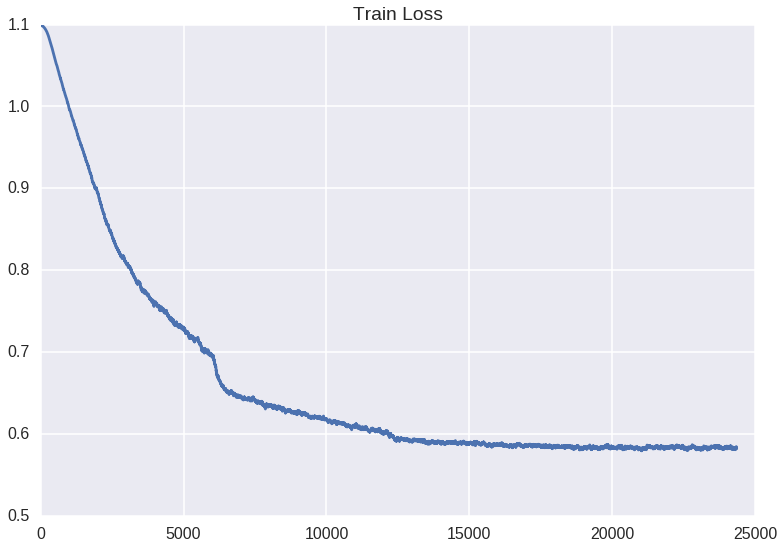

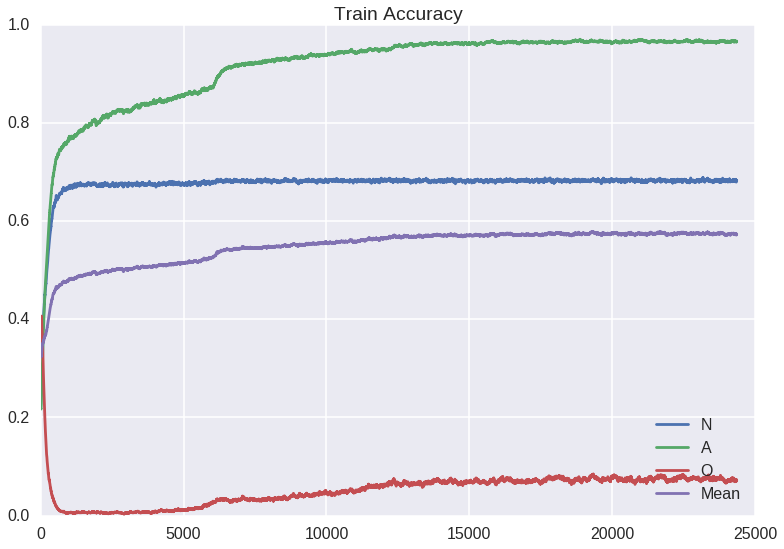

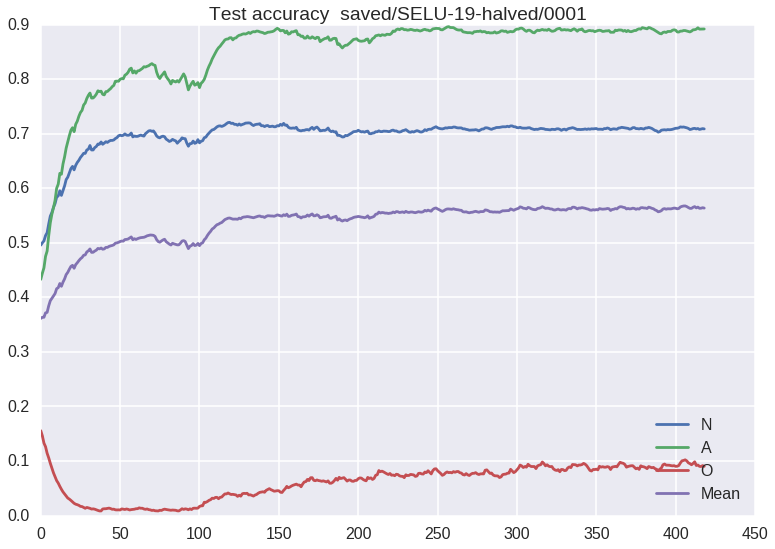

In [13]:
plot(G)
    

saved/SELU-19/0001


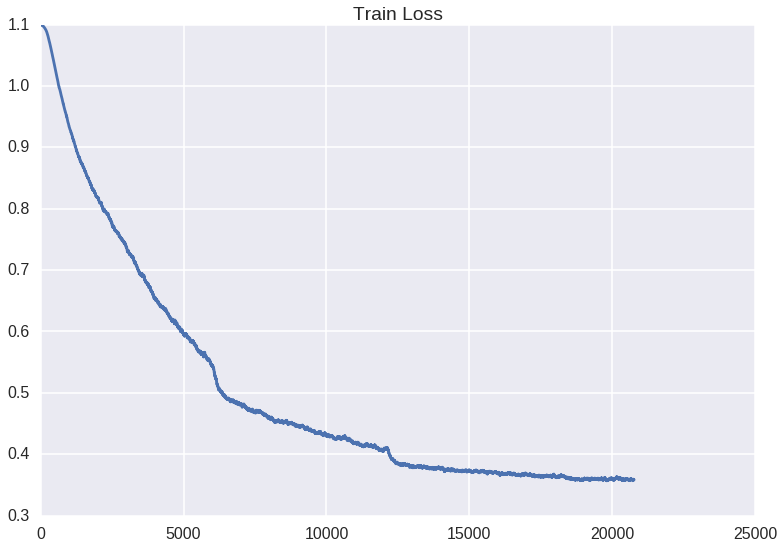

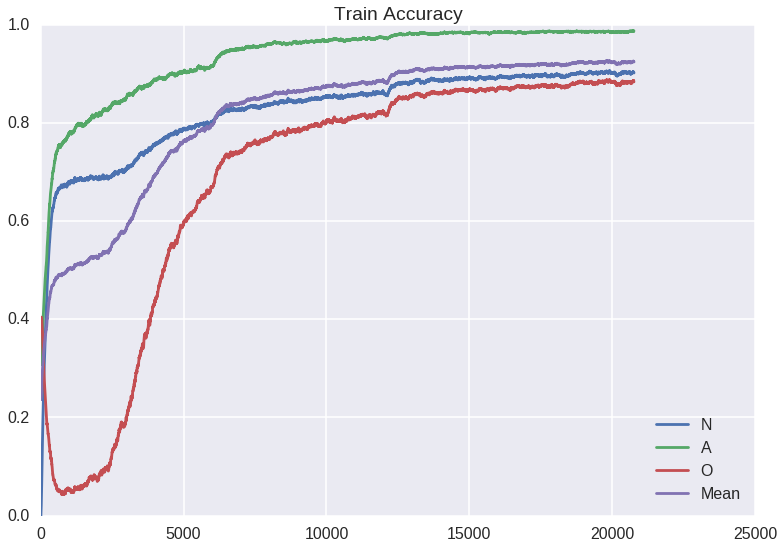

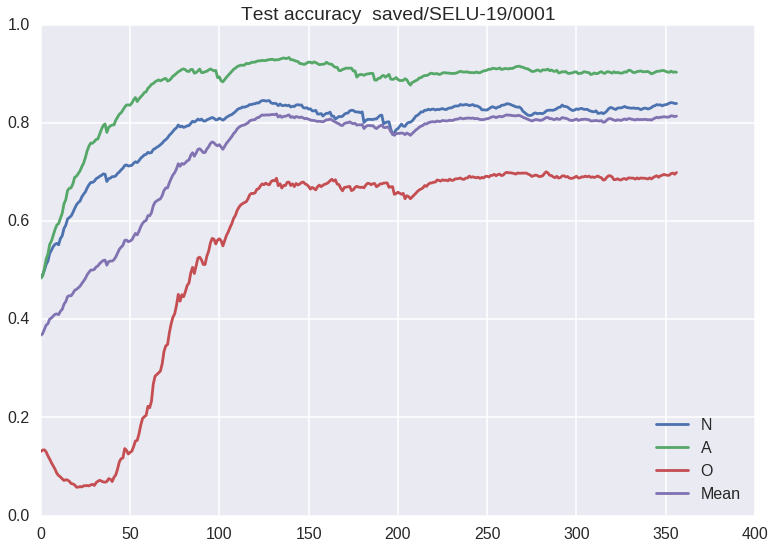

In [14]:
plot(H)
    

# plt.close()
plt.title('Mean F1 TEST accuracy for +2 dense networks')
add_plot(B)
add_plot(D)
add_plot(F)
add_plot(H)
plt.legend(loc='lower right')
plt.show()

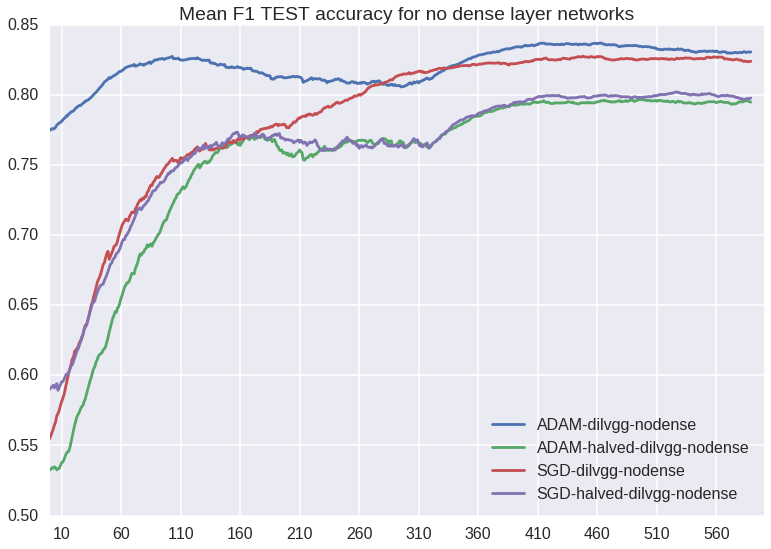

In [66]:
def add_plot(T, alpha=0.02):
    plt.plot(ema(th.cat(T.test_F1)[10:600, -1], alpha), label=T.path[6:-5])
plt.close()
plt.title('Mean F1 TEST accuracy for no dense layer networks')
add_plot(A)
add_plot(C)
add_plot(E)
add_plot(G)
plt.legend(loc='lower right')
plt.xticks(range(10, 600, 50))
plt.show()

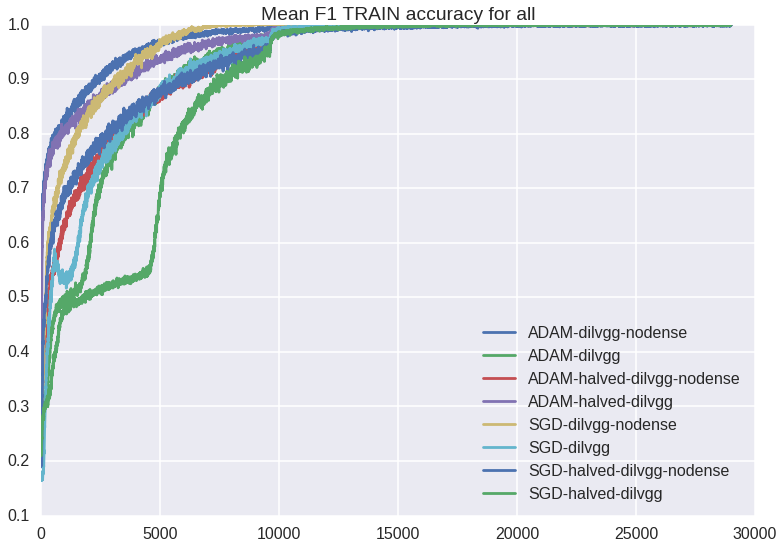

In [63]:
plt.close()
plt.title('Mean F1 TRAIN accuracy for all')
def add_plot(T, alpha=0.1):
    plt.plot(ema(th.cat(T.train_F1)[:, -1], alpha), label=T.path[6:-5])

for T in A, B, C, D, E, F, G, H:
    add_plot(T)
    
plt.legend(loc='lower right')
plt.show()